<a href="https://colab.research.google.com/github/IrfanKpm/machine-learning-diaries/blob/main/topics/ml%20algos/_09_SVM_with_Linear_Kernel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
# Step 1: Create Dummy Data
# Set seed for reproducibility
np.random.seed(42)

# Generate dummy data with three distinct classes
n_samples = 1000

# Define class centers
centers = {
    0: (0, 0),
    1: (3, 3),
    2: (-3, 3)
}

# Create an empty list to hold the data
X = []
y = []

# Generate data for each class
for class_label, center in centers.items():
    # Generate data points around the center
    X_class = np.random.randn(n_samples // 3, 2) + center
    y_class = np.full((n_samples // 3,), class_label)
    X.append(X_class)
    y.append(y_class)

# Combine the data into a single array
X = np.vstack(X)
y = np.concatenate(y)

# Create a DataFrame
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Target'] = y

# Shuffle the DataFrame
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
df.head(10)

,Feature 1,Feature 2,Target
0,1.640144,3.746254,1
1,-2.823558,2.632972,2
2,1.179297,0.067518,0
3,0.481009,0.223884,0
4,-2.277619,2.627167,2
5,2.311850,5.252436,1
6,-4.875172,3.115026,2
7,2.928399,2.962778,1
8,1.620681,2.269070,1
9,-3.546244,3.391804,2


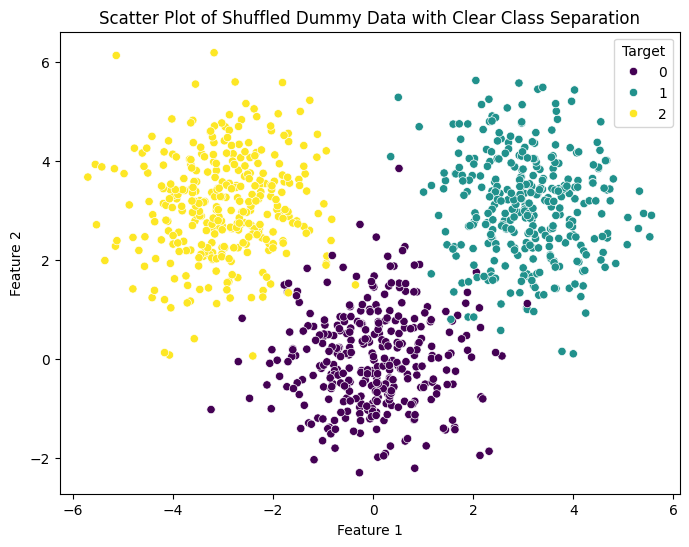

In [ ]:
# Step 2: Visualize the Data
# Scatter plot of the dummy data
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Feature 1', y='Feature 2', hue='Target', data=df, palette='viridis')
plt.title('Scatter Plot of Shuffled Dummy Data with Clear Class Separation')
plt.show()

In [ ]:
# Step 3: Split the Data
# Define features and target variable
X = df[['Feature 1', 'Feature 2']]
y = df['Target']

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Step 4: Feature Scaling
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Step 5: Train the SVM Model
# Initialize and train the SVM classifier with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# Step 6: Evaluate the Model
# Predict on the test set
y_pred = svm_model.predict(X_test_scaled)

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the classification report
report = classification_report(y_test, y_pred)
print("SVM Classification Report:\n", report)

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       115
           1       0.97      0.98      0.98       103
           2       0.96      0.99      0.98        82

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



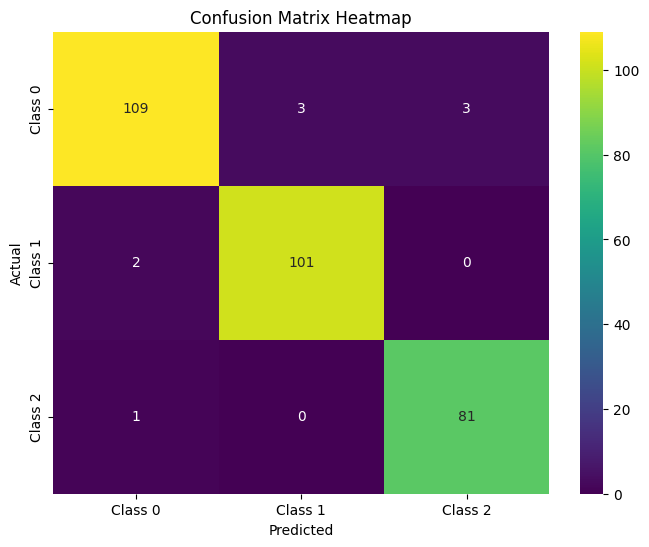

In [ ]:
# Step 7: Plot Heatmap for Confusion Matrix
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
# Step 8: Predict New Data
# New data point
new_data = np.array([[1.601, 0.812]])

# Standardize the new data point
new_data_scaled = scaler.transform(new_data)

# Predict the class for the new data point
prediction = svm_model.predict(new_data_scaled)
prediction_prob = svm_model.decision_function(new_data_scaled)

print(f"SVM Prediction for new data point {new_data}: {prediction[0]}")
print(f"Decision function value: {prediction_prob[0]}")

SVM Prediction for new data point [[1.601 0.812]]: 0
Decision function value: [ 2.27024237  1.06418707 -0.27296721]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
